***
***

# Personality vs. Risk of Drug Use --- Exploratory Data Analysis (EDA)

## *Classify type of drug consumer by personality data*

KEY OBJECTIVE: To invetigate the potential effect of big five personality traits, impulsivity, sensation-seeking, and demographic data on drug consumption for three different drug types.

VIRTUAL SETTING: To provide doctors/psychiatrists with insights into the correlation of personality traits, as well as selected demographic data (gender, age and education) with drug consumption, in particular illegal drugs (depressants, stimulants and halucinigens).

Data set regarding [Drug consumption (quantified)](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) obtained from UCI machine learing reposiitory.

***
***

### 1. General Information

"The problem of evaluating an individual's risk of drug consumption and misuse is highly important. An online survey methodology was employed to collect data including Big Five personality traits (NEO-FFI-R), impulsivity (BIS-11), sensation seeking (ImpSS), and demographic information. The data set contained information on the consumption of 18 central nervous system psychoactive drugs.
Drug use is a risk behaviour that does not happen in isolation; it constitutes an important factor for increasing risk of poor health, along with earlier mortality and morbidity, and has significant consequences for society.
Following the standard definitions, a drug is a ‘chemical that influences biological function (other than by providing nutrition or hydration)’. A psychoactive drug is a ‘drug whose influence is in a part on mental functions’. An abusable psychoactive drug is a ‘drug whose mental effects are sufficiently pleasant or interesting or helpful that some people choose to take it for a reason other than to relieve a specific malady’.
Drug consumption and addiction constitutes a serious problem globally. A number of factors are correlated with initial drug use including psychological, social, individual, environmental, and economic factors. These factors are likewise associated with a number of personality traits. While legal drugs such as sugar, alcohol and tobacco are probably responsible for far more premature death than illegal recreational drugs, the social and personal consequences of recreational drug use can be highly problematic.
Psychologists have largely agreed that the personality traits of the Five Factor Model (FFM) are the most comprehensive and adaptable system for understanding human individual differences.
A number of studies have illustrated that personality traits are associated to drug consumption.
An individual’s personality profile plays a role in becoming a drug user."

Cited from [key reference:](https://arxiv.org/pdf/1506.06297.pdf) E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv, 2015

***
***

### 2. Dataset Characteristics

#### Observations

+ 1885 survey participants


#### Features
+ 5 Features regarding demographic information: age --- gender --- country of residence --- level of education --- ethnicity
        
        
+ 12 Attributes regarding personality measurements  
    + NEO-FFI-R (Revised NEO Five-Factor Inventory - test - short version) tests for the following character traits ([five-factor model](https://www.psychologistworld.com/personality/five-factor-model-big-five-personality), [OCEAN](https://www.simplypsychology.org/big-five-personality.html))
        (O)peness | (C)onscientious | (E)xtraversion | (A)greeableness | (N)euroticism
        --- | --- | --- | --- | ---
        general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests | organized and dependable, strong-willed, persistent, reliable, and efficient | outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics | interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness | long-term tendency to experience negative emotions such as nervousness, tension, anxiety and depression

    + Additional character traits  
        [BIS-11](http://www.impulsivity.org/measurement/bis11) | [ImpSS](https://www.psytoolkit.org/survey-library/zkpq-50-cc.html)
        --- | ---
        Barratt Impulsiveness Score | Impulsiveness Sensation Seeking
        impulsivity | sensation seeking
            
            
+ Drug consumption with regard to 18 legal and illegal drugs, as well as 1 ficticious drug

        
    6 depressants (DOWNER) | 6 stimulants (UPPER) | 5 hallucinogens | legal highs
    --- | --- | --- | ---
    alcohol | chocolate (choc) | cannabis | legal highs
    amyl nitrate (amyl) | caffeine (caff) | ecstasy | ---
    benzodiazepines (benzos) | nicotine | ketamine | ---
    heroin| amphetamines (amphet) | lysergic acid diethylamide (lsd) | ---
    methadone(meth) | cocaine (coke) | mushrooms (shrooms) | ---
    volatile substance abuse(vsa) | cocaine (crack) | --- | ---
        
        

    CL0 | CL1 | CL2 | CL3 | CL4 | CL5 | CL6
    --- | --- | --- | --- | --- | --- | ---
    never used | used over a decade ago | used in last decade | used in last year | used in last month | used in last week | used in last day
        
            
    Plus 1 ficticious drug (Semeron) to identify over-claimers

        
**Note: All attributes are categorical and were quantified as [T-scores](http://www.healthpsych.com/bhi/doublenorm.html).**

***
***

### 3. Import data and relevant libraries

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileRepor
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns
import altair as alt
from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline
dpi_var=150
bbox_inches_var='tight'

In [2]:
# add to makefile?
#!pip install xlrd
#!pip install pandas_profiling

In [3]:
# Read in data and convert column names to lowercase
df = pd.read_excel('data/drug_consumption.xls')
df.columns = map(str.lower, df.columns)

***
***

### 4. Data overview and descriptive statistics

In [4]:
# Top 5 rows of dataset
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
# Index and rows/columns, data type and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   nscore     1885 non-null   float64
 7   escore     1885 non-null   float64
 8   oscore     1885 non-null   float64
 9   ascore     1885 non-null   float64
 10  cscore     1885 non-null   float64
 11  impulsive  1885 non-null   float64
 12  ss         1885 non-null   float64
 13  alcohol    1885 non-null   object 
 14  amphet     1885 non-null   object 
 15  amyl       1885 non-null   object 
 16  benzos     1885 non-null   object 
 17  caff       1885 non-null   object 
 18  cannabis   1885 non-null   object 
 19  choc       1885 non-null   object 
 20  coke    

In [6]:
# Overview of key statistical data for columns 1 to 12, i.e. general info and personality info
df.describe()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
# Check out the categories for drug consumption with heroin as example
df.heroin.unique()

array(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL6', 'CL4'], dtype=object)

***

#### Summary
+ No missing values
+ Categories for drug consumption features
+ Floats for personality and general information

#### Next Steps
+ Drop ID columns as superfluous
+ Drop observations for fictitious drug Semeron (semer) if not equal CL0 (never used) as it indicates low trustworthyness and therefore could lead to wrong answeres. Then drop entire column as check completed.
+ For the purpose of this analysis group NON-USERS (CL0 and CL1) and drug USERS (CL2 to CL6)

***
***

### 5. Data cleaning and feature engineering

***
#### A) Drop rows and columns that are not required

In [8]:
# Drop superfluous ID column
df = df.drop('id', 1)

In [9]:
# Drop observations for fictitious drug Semeron (semer) if not equal CL0 (never used)
indexNames = df[df['semer'] != 'CL0'].index
print(indexNames)
df.drop(indexNames , inplace=True)

Int64Index([727, 817, 1516, 1533, 1698, 1769, 1806, 1823], dtype='int64')


+ 8 Overclaimers were dropped

In [10]:
# Then drop feature column Semeron (semer) altogether
df = df.drop('semer', 1)

***

#### B) Merge drug categories accoring to their biological effects for Users and Non-User

#### Three different classes of illegal drugs are investigated in this analysis

+ 5 Depressants (DOWNER)
    + amyl nitrate (amyl),  benzodiazepines (benzos), heroin, methadone(meth), volatile substance abuse(vsa)
+ 3 Stimulants (UPPER)
    + amphetamines (amphet), cocaine (coke),  cocaine (crack)
+ 5 Hallucinogens
    + cannabis, ecstasy, ketamine, Lysergic acid diethylamide (lsd), mushrooms (shrooms)

#### Users and Non-Users were defined as follows for this analysis

+ Users (CL2 to CL6) --- drugs consumed within last decade
+ Non-User (CL0 & CL1) --- consumed over a decade ago or never consumed drugs

#### Six legal drugs were not considered in this analysis

+ alcohol, chocolate (choc), caffeine (caff), nicotine
+ legal highs (legalh)
+ methadone (meth)

<AxesSubplot:xlabel='meth', ylabel='count'>

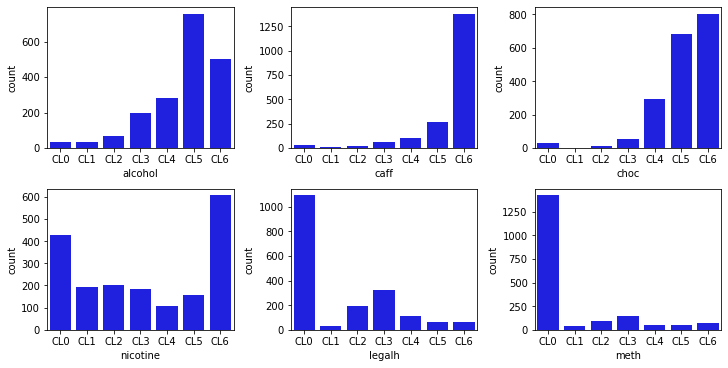

In [11]:
# Distribution of legal drug use classification (CL0 to CL6)
order = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']

fig, ax = plt.subplots(2,3, figsize=(10,5), constrained_layout=True)

sns.countplot(x='alcohol', data=df, ax=ax[0,0], order=order, color='blue')
sns.countplot(x='caff', data=df, ax=ax[0,1], order=order, color='blue')
sns.countplot(x='choc', data=df, ax=ax[0,2], order=order, color='blue')
sns.countplot(x='nicotine', data=df, ax=ax[1,0], order=order, color='blue')
sns.countplot(x='legalh', data=df, ax=ax[1,1], order=order, color='blue')
sns.countplot(x='meth', data=df, ax=ax[1,2], order=order, color='blue')

***
+ Strongly left-skewed distribution (consume regularly) for alcohol, caffeine and chocolate
+ Either consume daily or a long time ago
+ Strongly right-skewed distribution for legal highs and methadone
+ NOTE: Legals drugs not considered in this analysis
***

<AxesSubplot:xlabel='lsd', ylabel='count'>

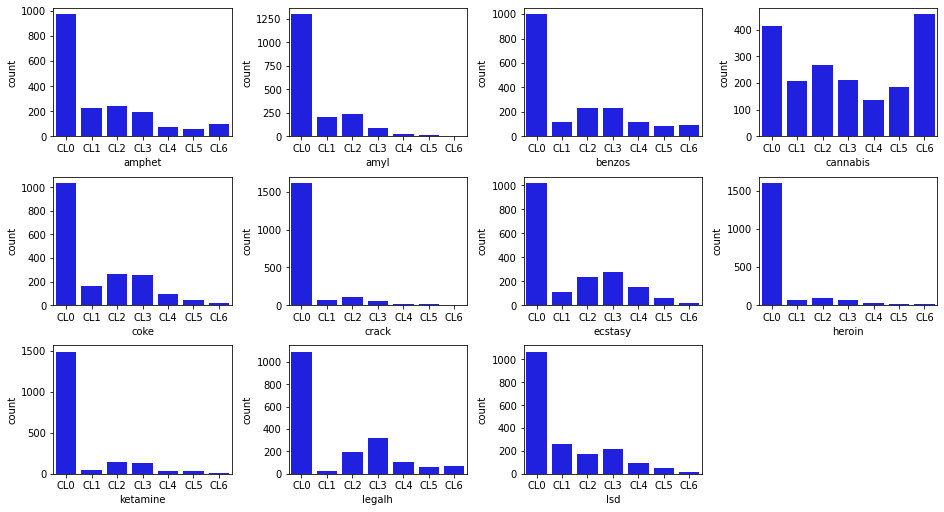

In [12]:
# Distribution of illegal drug use classification (CL0 to CL6)
order = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']

fig, ax = plt.subplots(3,4, figsize=(13,7), constrained_layout=True)
ax[2, 3].set_visible(False)

sns.countplot(x='amphet', data=df, ax=ax[0,0], order=order, color='blue')
sns.countplot(x='amyl', data=df, ax=ax[0,1], order=order, color='blue')
sns.countplot(x='benzos', data=df, ax=ax[0,2], order=order, color='blue')
sns.countplot(x='cannabis', data=df, ax=ax[0,3], order=order, color='blue')
sns.countplot(x='coke', data=df, ax=ax[1,0], order=order, color='blue')
sns.countplot(x='crack', data=df, ax=ax[1,1], order=order, color='blue')
sns.countplot(x='ecstasy', data=df, ax=ax[1,2], order=order, color='blue')
sns.countplot(x='heroin', data=df, ax=ax[1,3], order=order, color='blue')
sns.countplot(x='ketamine', data=df, ax=ax[2,0], order=order, color='blue')
sns.countplot(x='legalh', data=df, ax=ax[2,1], order=order, color='blue')
sns.countplot(x='lsd', data=df, ax=ax[2,2], order=order, color='blue')

***
+ Normal distributions for User (CL1 to CL6)
+ Still for every category mainly Non-Users (CL0)
+ Cannabis shows more complex multi-modal diistribution
+ Divide at CL0 or CL1
***

In [13]:
# Define Users and Non-Users
dict_drug_cat = {'CL0': False, 'CL1': False, 'CL2': True, 'CL3': True,
                 'CL4': True, 'CL5': True,  'CL6': True}

# Map three types of drug types to ctual drugs
depressants = ['amyl',  'benzos', 'heroin', 'meth', 'vsa']
stimulants  = ['amphet', 'coke',  'crack']
halucinogens = ['cannabis', 'ecstasy', 'ketamine', 'lsd', 'shrooms']
ls_cat_all = depressants + stimulants + halucinogens

# Create new columns for three drug types in dataframe
for col_i in ls_cat_all:
    df[col_i] = df[col_i].map(dict_drug_cat)
df['depressants'] = df[df[depressants] != False ].any(axis='columns')
df['stimulants'] = df[df[stimulants] != False ].any(axis='columns')
df['halucinogens'] = df[df[halucinogens] != False ].any(axis='columns')

# Drop original drug columns
ls_drugs = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
            'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'shrooms', 'nicotine', 'vsa']
df = df.drop(ls_drugs, 1)

NOTE: Save dataframe for model

In [14]:
#df.to_csv("data/drug_consumption_after_eda.csv")

***
#### C) Add new column for general drug use irrespective of drug type

In [15]:
df['drug_use'] = df.depressants | df.stimulants | df.halucinogens

***
#### D) Convert demographic information to actual categories

In [16]:
# Convert age to real values 
age_dict = {-0.95197: '18-24',-0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54',
            1.82213: '55-64', 2.59171: '65+'}
df.age = df.age.map(age_dict)


# Convert gender to real values
gender_dict = {0.48246: 'female',-0.48246: 'male'}
df.gender = df.gender.map(gender_dict)


# Convert education to real values
education_dict = { -2.43591: 'School (left at 16 y)', -1.73790: 'School (left at 16 y)', 
                  -1.43719: 'School (left at 17 y)', -1.22751: 'School (left at 18 y)',
                  -0.61113: 'College/University (no cert.)',
                  -0.05921: 'Certificate/Diploma', 0.45468: 'University Degree',
                  1.16365: 'Master Degree' ,1.98437: 'Doctorate'} 
df.education = df.education.map(education_dict)


# Convert country to real values
country_dict = {-0.09765: 'Australia', 0.24923: 'Canada', -0.46841: 'New Zealand', -0.28519: 'Other',  
                0.21128: 'Republic of Ireland', 0.96082: 'UK' , -0.57009: 'USA'}
df.country = df.country.map(country_dict)


# Convert ethnicity to real values 
ethnicity_dict = {-0.50212: 'Asian', -1.10702: 'Black', 1.90725: 'Mixed-Black/Asian', 0.12600: 'Mixed-White/Asian',
                  -0.22166: 'Mixed-White/Black', 0.11440: 'Other', -0.31685: 'White'}
df.ethnicity = df.ethnicity.map(ethnicity_dict)

***
#### E) Convert personality traits to categories based on T-score system (very low --- low --- average --- high --- very high)

<AxesSubplot:xlabel='nscore', ylabel='Count'>

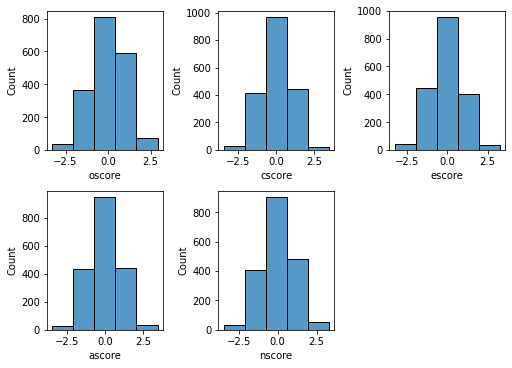

In [17]:
# Distribution of the OCEAN data z-scores
fig, ax = plt.subplots(2,3, figsize=(7,5), constrained_layout=True)
ax[1, 2].set_visible(False)

sns.histplot(x='oscore', data=df, ax=ax[0,0], bins=5)
sns.histplot(x='cscore', data=df, ax=ax[0,1], bins=5)
sns.histplot(x='escore', data=df, ax=ax[0,2], bins=5)
sns.histplot(x='ascore', data=df, ax=ax[1,0], bins=5)
sns.histplot(x='nscore', data=df, ax=ax[1,1], bins=5)

<AxesSubplot:xlabel='ss', ylabel='Count'>

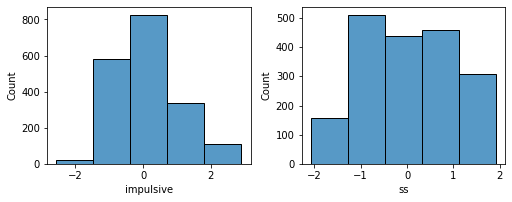

In [18]:
# Distribution of the impulsiveness and sensation seeking Z-scores
fig, ax = plt.subplots(2,2, figsize=(7,5), constrained_layout=True)
ax[1, 0].set_visible(False)
ax[1, 1].set_visible(False)

sns.histplot(x='impulsive', data=df, ax=ax[0,0], bins=5)
sns.histplot(x='ss', data=df, ax=ax[0,1], bins=5)

***
+ Normal distributions for alll personality traits apart from sensation-seeking -> convert to 5 categories
***

In [19]:
# Bin all personality traits into five categories
bins = [-10, -2, -0.8, 0.8, 2, 10]
labels = ['very low', 'low', 'average', 'high', 'very high']

# Bin five-factor data according to T-score system
df['openness'] = pd.cut(df['oscore'],bins=bins, labels=labels)
df['conscientiousness'] = pd.cut(df['cscore'],bins=bins, labels=labels)
df['extraversion'] = pd.cut(df['escore'],bins=bins, labels=labels)
df['agreeableness'] = pd.cut(df['ascore'],bins=bins, labels=labels)
df['neuroticism'] = pd.cut(df['nscore'],bins=bins, labels=labels)

# Bin according to/in analogy to Barratt Impulsiveness Scale
df['impulsiveness'] = pd.cut(df['impulsive'],bins=bins, labels=labels)
df['sensation_seeking'] = pd.cut(df['ss'],bins=bins, labels=labels)

# Drop all original columns for character traits
ls_pers_traits = ['oscore', 'cscore', 'escore', 'ascore', 'nscore', 'ss', 'impulsive']
df = df.drop(ls_pers_traits, 1)

OPTIONAL: Run Pandas Profiling for a quick overview of the data

In [20]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

***
***
### 6. In depth data analysis

***
#### A) General overview --- heatmaps
+ Average personalities (example depicted below) have the highest number of drug user, but this is in absolute numbers and reflects the distribution of the personalitiy traits
+ Young people at universty have the highest number of drug user, but this is in absolute numbers and reflects the distribution in education
-> NEXT STEPS: Look at distributions and then normalise data in plots

In [21]:
#Altair heatmap (age - education - gender)
alt.Chart(
    df,
    title= 'Heatmap Overview'
).mark_rect().encode(
    x='age',
    y=alt.Y('education', sort=['School (left at 16 y)', 'School (left at 17 y)', 'School (left at 18 y)',
                                'College/University (no cert.)', 'Certificate/Diploma', 'University Degree',
                                'Master Degree','Doctorate']),
    color=alt.Color('count(drug_use):Q', scale=alt.Scale(scheme='turbo')),
    facet=alt.Facet('gender:N', columns=2)
).configure_scale(
    bandPaddingInner=0.1
).properties(width=200, height=200,
)

alt.Chart(...)

In [22]:
#Altair heatmap (conscientiousness - agreeableness)
alt.Chart(
    df,
    title= 'Heatmap Overview'
).mark_rect().encode(
    x=alt.X('conscientiousness', sort=['very low', 'low', 'average', 'high', 'very high']),
    y=alt.Y('agreeableness', sort=['very low', 'low', 'average', 'high', 'very high']),
    color=alt.Color('count(drug_use):Q', scale=alt.Scale(scheme='turbo')),
    facet=alt.Facet('gender:N', columns=2)
).configure_scale(
    bandPaddingInner=0.1
).properties(width=150, height=150,
)

alt.Chart(...)

***
#### B) DISTRIBUTIONS of drug use
+ Overall drug use: Most survey participants use drugs (about 3:1)
+ Depressants and stimulants: Equally distributed amongst survey participants
+ Halucinogens: Most survey participants use halucinogens (about 3:1)

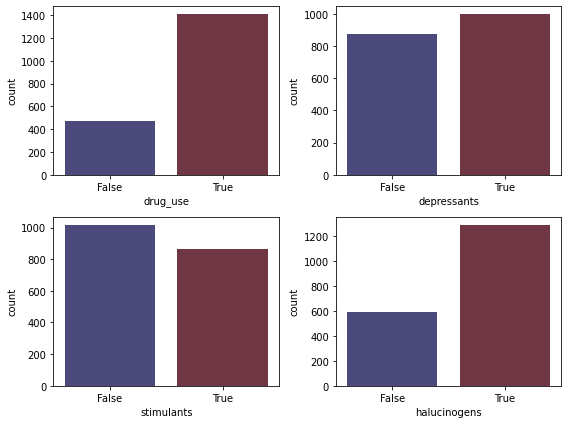

In [23]:
# Seaborn countplots for general drug use and different types of drug
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

sns.countplot(x='drug_use', data=df, ax=ax[0,0], palette='icefire')
sns.countplot(x='depressants', data=df, ax=ax[0,1], palette='icefire')
sns.countplot(x='stimulants', data=df, ax=ax[1,0], palette='icefire')
sns.countplot(x='halucinogens', data=df, ax=ax[1,1], palette='icefire')

fig.tight_layout()

***
#### C) DISTRIBUTIONS for the demographic features
+ Gender: Equal
+ Age: Declining from 18 to 65+ years
+ Education: No obvious pattern
+ Country: Approx over 90% UK & USA
+ Ethnicity: Approx over 90% white

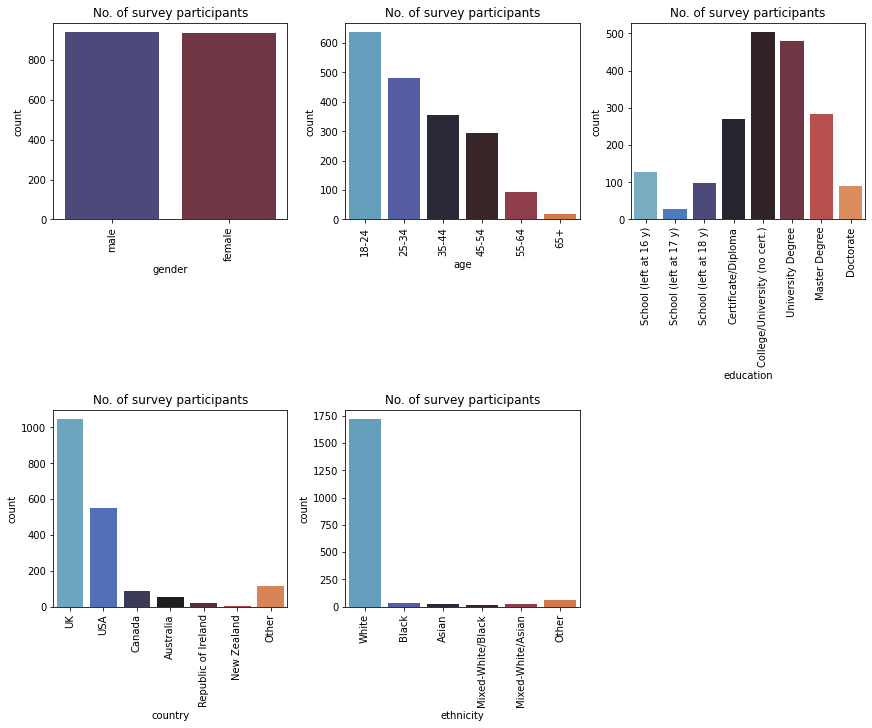

In [24]:
# Seaborn countplots for demographic features
ls_gender = ['male', 'female']
ls_age = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
ls_education = ['School (left at 16 y)', 'School (left at 17 y)', 'School (left at 18 y)', 'Certificate/Diploma',
              'College/University (no cert.)', 'University Degree', 'Master Degree', 'Doctorate']
ls_country = ['UK', 'USA', 'Canada', 'Australia', 'Republic of Ireland', 'New Zealand', 'Other']
ls_ethnicity = ['White', 'Black', 'Asian', 'Mixed-White/Black', 'Mixed-White/Asian', 'Other']
                       
fig, ax = plt.subplots(2,3, figsize=(12,10), constrained_layout=True)
ax[1, 2].set_visible(False)

sns.countplot(x="gender", data=df, ax=ax[0,0], order=ls_gender, palette='icefire')
sns.countplot(x="age", data=df, ax=ax[0,1], order=ls_age, palette='icefire')
sns.countplot(x="education", data=df, ax=ax[0,2], order=ls_education, palette='icefire')
sns.countplot(x="country", data=df, ax=ax[1,0], order=ls_country, palette='icefire')
sns.countplot(x="ethnicity", data=df, ax=ax[1,1], order=ls_ethnicity, palette='icefire')

ax[0, 0].set_title('No. of survey participants')
ax[0, 1].set_title('No. of survey participants')
ax[0, 2].set_title('No. of survey participants')
ax[1, 0].set_title('No. of survey participants')
ax[1, 1].set_title('No. of survey participants')
ax[0, 0].set_xlabel('gender')
ax[0, 1].set_xlabel('age')
ax[0, 2].set_xlabel('education')
ax[1, 0].set_xlabel('country')
ax[1, 1].set_xlabel('ethnicity')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

***
#### D) DISTRIBUTIONS for the personality traits
+ Based on the design of personality questionaires the personality traits are normally distributed across the 5 categories.

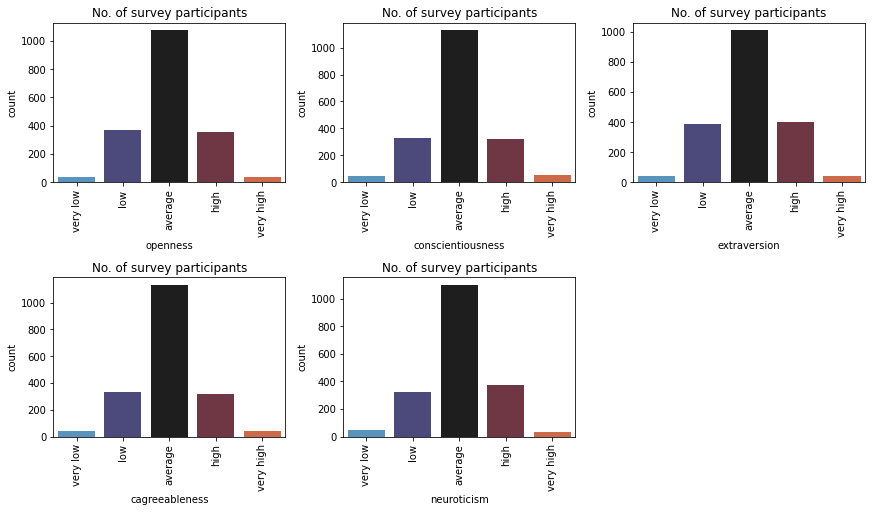

In [25]:
# Seaborn countplots for OCEAN (big five) personality traits
fig, ax = plt.subplots(2,3, figsize=(12,7), constrained_layout=True)
ax[1, 2].set_visible(False)

sns.countplot(x='openness', data=df, ax=ax[0,0], palette='icefire')
sns.countplot(x='conscientiousness', data=df, ax=ax[0,1], palette='icefire')
sns.countplot(x='extraversion', data=df, ax=ax[0,2], palette='icefire')
sns.countplot(x='agreeableness', data=df, ax=ax[1,0], palette='icefire')
sns.countplot(x='neuroticism', data=df, ax=ax[1,1], palette='icefire')

ax[0, 0].set_title('No. of survey participants')
ax[0, 1].set_title('No. of survey participants')
ax[0, 2].set_title('No. of survey participants')
ax[1, 0].set_title('No. of survey participants')
ax[1, 1].set_title('No. of survey participants')
ax[0, 0].set_xlabel('openness')
ax[0, 1].set_xlabel('conscientiousness')
ax[0, 2].set_xlabel('extraversion')
ax[1, 0].set_xlabel('cagreeableness')
ax[1, 1].set_xlabel('neuroticism')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

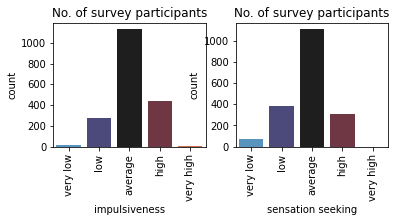

In [26]:
# Seaborn countplots for impulsiveness and sensation seeking
fig, ax = plt.subplots(2,2, figsize=(6,5))
ax[1, 0].set_visible(False)
ax[1, 1].set_visible(False)


sns.countplot(x='impulsiveness', data=df, ax=ax[0,0], palette='icefire')
sns.countplot(x='sensation_seeking', data=df, ax=ax[0,1], palette='icefire')

ax[0, 0].set_title('No. of survey participants')
ax[0, 1].set_title('No. of survey participants')
ax[0, 0].set_xlabel('impulsiveness')
ax[0, 1].set_xlabel('sensation seeking')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

***
#### E) CORRELATIONS of demographic data with drug use
+ Drug consumption declines with age.
+ Male survey participants consume more drug in general than female participants.
+ Due to the strong biases regarding country (mainly UK and USA) and ethnicity (mainly white) these groups were not analysed further.

In [ ]:
# Seaborn barplots for correlations of demographic data with drug use
# Note: X-axis to be ordered correctly 
sns.set()

x_vars = ['age', 'gender', 'education', 'country', 'ethnicity']
y_vars = ['drug_use', 'depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(20,10)
g.set(ylim=(0, 1))

for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)

***
#### F) DETAILED CORRELATIONS of education with drug use
+ No clear correlation observed for education
+ Male survey participants consume more drugs than female participants.

In [ ]:
# Number of participants per education level
df.education.value_counts()

In [ ]:
# Seaborn catplot for correlations of education with drug use for presentation
x, y, hue = 'education', 'drug_use', 'gender'
hue_order = ['male', 'female']
order_list = ['School (left at 16 y)', 'School (left at 17 y)', 'School (left at 18 y)', 'Certificate/Diploma',
              'College/University (no cert.)', 'University Degree', 'Master Degree', 'Doctorate']
plt.figure(figsize=(15, 15))

sns.catplot(x=x, y=y, hue=hue,
            data=df,
            kind='bar',
            palette='icefire',
            order = order_list,
            hue_order=hue_order,
            ci=None
).set(
       ylabel='Relative drug consumption',
       xlabel=' '
)

plt.xticks(rotation=70)

plt.savefig('images/education.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

***
#### G) DETAILED CORRELATIONS of age with drug use
+ Drug consumption appears to decline with age
+ Male survey participants appear to consume more drugs than female participants
+ Elderly people over 65 consume more depressants than stimulants/halucinogens as compared to younger people

In [ ]:
# Number of participants per age group
df.age.value_counts()

In [ ]:
# Seaborn catplot for correlations of age with drug use for presentation
x, y, hue = 'age', 'drug_use', 'gender'
hue_order = ['male', 'female']
order_list = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
plt.figure(figsize=(15, 15))

sns.catplot(x=x, y=y, hue=hue,
            data=df,
            kind='bar',
            palette='icefire',
            order = order_list,
            hue_order=hue_order,
            ci=None
).set(
       xlabel='age',
       ylabel='Relative drug consumption',
)
plt.title(' ');

plt.savefig('images/age.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

In [ ]:
#Age versus drug types
sns.set()

x_vars = ['age']
y_vars = ['depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(7,10)
g.set(ylim=(0.0, 1.0))

***
#### H) CORRELATIONS of personality traits with drug use

#### OCEAN personality traits
+ In general more survey participants with higher levels regarding openness and neuroticism take drugs than those with lower levels of these character traits.
+ In general fewer survey participants with higher levels regarding conscientiousness and agreeableness take drugs than those with lower levels of these character traits.
+ Higher levels of openness correlate most strongly with higher drug use for stimulants and halucinogens.
+ Higher levels of neuroticism correspond most strongly with higher drug use for depressants.
+ Very high and very low levels of extraversion correlate somewhat with higher drug use in general.
+ For very high and very low levels of openness, conscientiousness and neuroticism these effects flip.

In [ ]:
# Number of participants per drug type
for i in ['drug_use', 'depressants', 'stimulants', 'halucinogens']:
    print(df[i].value_counts())

In [ ]:
#Complete overview of OCEAN personality traits versus drug use
sns.set()

x_vars = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
y_vars = ['drug_use', 'depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(15,15)
g.set(ylim=(0, 1))

In [ ]:
#Overview of OCEAN traits versus drug use for presentation
sns.set()

x_vars = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
y_vars = ['drug_use']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire').set(ylabel='Relative drug consumption')
g.fig.set_size_inches(15,5)
plt.ylim((0.5,1.0))

plt.savefig('images/drug_use_ocean.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

In [ ]:
#Openness versus drug types for presentation
sns.set()

x_vars = ['openness']
y_vars = ['depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(7,10)
g.set(ylim=(0.0, 1.0))

plt.savefig('images/openness.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

In [ ]:
#Neuroticism versus drug types for presentation
sns.set()

x_vars = ['neuroticism']
y_vars = ['depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(7,10)
g.set(ylim=(0.25, 0.9))

plt.savefig('images/neuroticism.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

#### Impulsiveness and sensation seeking
+ High impulsiveness and sensation seeking scores correlate with higher drug use.
+ NOTE: No survey participants with very high sensation seeking score.

In [ ]:
#Impuliveness and sensation seeking versus drug types
sns.set()

x_vars = ['impulsiveness', 'sensation_seeking']
y_vars = ['drug_use', 'depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(10,10)
g.set(ylim=(0, 1))

In [ ]:
#Impulsineness and sensation seeking versus drug types for presentation
sns.set()

x_vars = ['impulsiveness', 'sensation_seeking']
y_vars = ['drug_use']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire').set(ylabel='Relative drug consumption')
g.fig.set_size_inches(10,5)
plt.ylim((0.3,1.0))

plt.savefig('images/BIS_SS.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

In [ ]:
#Impulsiveness versus drug types for presentation
sns.set()

x_vars = ['impulsiveness']
y_vars = ['depressants', 'stimulants', 'halucinogens']

g = sns.PairGrid(data=df, x_vars=x_vars, y_vars=y_vars)
g.map(sns.barplot, ci=None, palette='icefire')
g.fig.set_size_inches(7,10)
g.set(ylim=(0.0, 1.0))

plt.savefig('images/BIS.png', dpi=dpi_var, bbox_inches=bbox_inches_var)

***
***

### 7. Conclusion
The data from the study regarding the influences of socio-demographic factors and personality traits on substance abuse (only illegal substances were included in this analysis) show clearly that age (significantly more younger people included in the study), gender (equally distributed) and personality traits correlate with drug abuse. Drug consumption appears to decline with age and seem to be lower for women compared to men. Education on the other hand shows little to no correlation with substance abuse. With regard to OCEAN personality traits the data shows a higher proportion of survey participants with higher levels regarding openness and neuroticism to consume drugs than those with lower levels of these character traits. On the other hand the correlation of conscientiousness and agreeableness regarding substance abuse is vice versa to that of openness and neuroticism. Furthermore, higher levels of openness correlate most strongly with higher drug use for stimulants and halucinogens, whereas higher levels of neuroticism correspond most strongly with higher drug use for depressants. It should also be noted that for very high and very low levels of openness, conscientiousness and neuroticism the effects seem to flip. With regard to extraversion the correlation is not as straightforward as very high and very low levels seem to correlate somewhat with higher drug use in general. regarding the additional two personality traits included in the questionaire, high impulsiveness and sensation seeking scores both correlate with higher drug use.

NOTE: With respect to the distribution of the data it should be noted that emographic data such as country and ethnicity were not included in the analysis as the data set is strongly biased towards white US/UK citizens. 

***
***

### 8. Next Steps

+ Check personality traits for participants that score average in all traits (check trustworthiness) and consider removing these observations.
+ Repeat analysis and model for different User/Non-User splits, e.g. CL0=Non-User, CL1-Cl6=User
+ Repeat model without country and ethnicity due to strong bias, and also remove education based on lack of correlation
+ Check out if OCEAN personality traits are sufficient for prediction, as this would reduce the number of questionaires
+ To further investigate which specific combinations of personality traits are linked to drug use
+ More detailed analysis into legal highs, methadone and cannabis
***
***